![Texto](https://dadosaocubo.com/wp-content/uploads/2020/06/DADOS-AO-CUBO-Vers%C3%A3o-04-1.png) 

# Engenharia de atributos com Sci-kit Learn

[__D³__](https://dadosaocubo.com/) por [__Cairo Rocha__](https://www.linkedin.com/in/cairo-rocha/) 

### 1. Carregando dados

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
import missingno as msno

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data= load_boston()
Y = data['target']
X = data['data']
cols = data['feature_names']
X = pd.DataFrame(X, columns=cols)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#Criando valores nulos
def create_null(col, threshold=0.9):
  l = []
  for c, value in col.iteritems():
    r = np.random.rand()
    l.append(None if r > threshold else value)
  return l

X_null = X.apply(create_null, axis=0, result_type='expand')
X_null.isna().sum()

CRIM       58
ZN         47
INDUS      45
CHAS       43
NOX        54
RM         44
AGE        55
DIS        53
RAD        46
TAX        54
PTRATIO    41
B          56
LSTAT      49
dtype: int64

In [ ]:
X[X<0].sum() #Nenhum valor menor que 0

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
dtype: float64

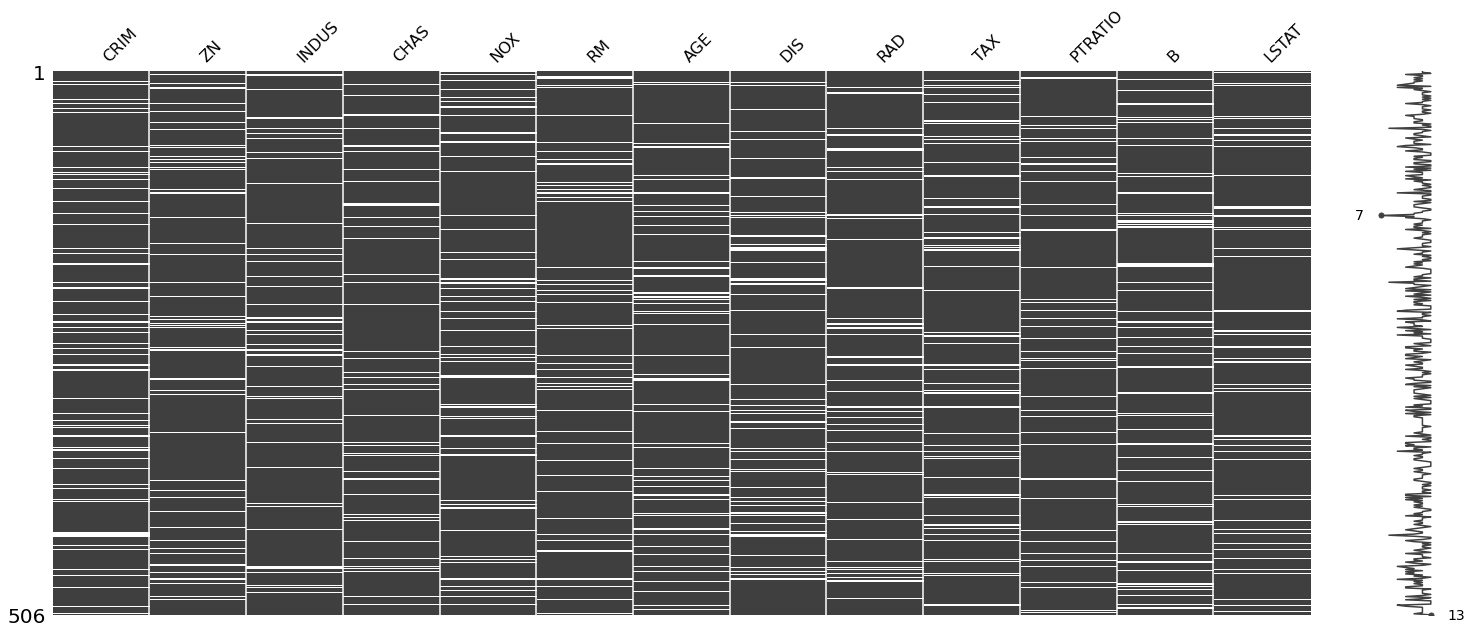

In [ ]:
msno.matrix(X_null); #Mostrando onde estão os valores nulos

### 2. Imputando valores faltantes

In [ ]:
imp_mean = SimpleImputer(strategy='mean')
imp_median = SimpleImputer(strategy='median')
imp_mode = SimpleImputer(strategy='most_frequent')
imp_const = SimpleImputer(strategy='constant', fill_value=-1)

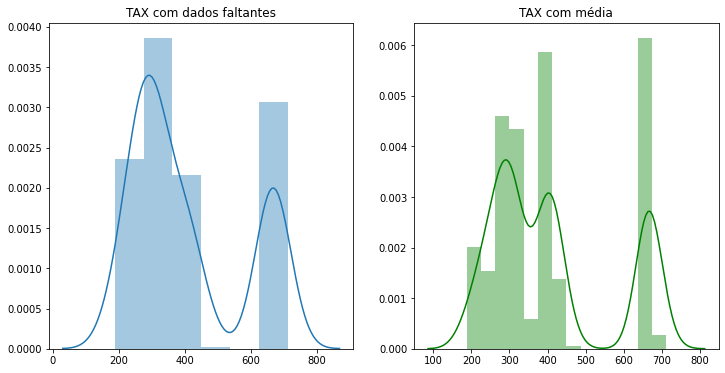

In [ ]:
X_TAX_mean = imp_mean.fit_transform(X_null['TAX'].values.reshape(-1,1))

fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.distplot(X_null['TAX'], ax=ax[0])
sns.distplot(X_TAX_mean, ax=ax[1], color='green')
ax[0].set(title="TAX com dados faltantes", xlabel="", ylabel="")
ax[1].set(title="TAX com média", xlabel="", ylabel="")
plt.show()

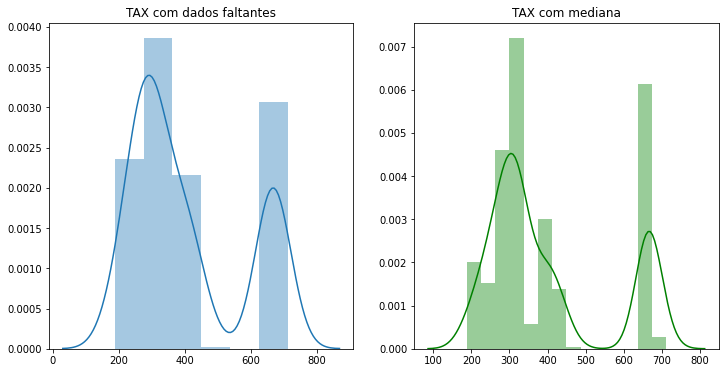

In [ ]:
X_TAX_median = imp_median.fit_transform(X_null['TAX'].values.reshape(-1,1))

fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.distplot(X_null['TAX'], ax=ax[0])
sns.distplot(X_TAX_median, ax=ax[1], color='green')
ax[0].set(title="TAX com dados faltantes", xlabel="", ylabel="")
ax[1].set(title="TAX com mediana", xlabel="", ylabel="")
plt.show()

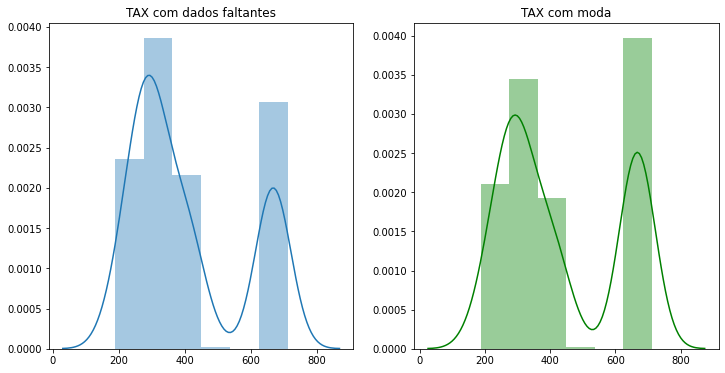

In [ ]:
X_TAX_mode = imp_mode.fit_transform(X_null['TAX'].values.reshape(-1,1))

fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.distplot(X_null['TAX'], ax=ax[0])
sns.distplot(X_TAX_mode, ax=ax[1], color='green')
ax[0].set(title="TAX com dados faltantes", xlabel="", ylabel="")
ax[1].set(title="TAX com moda", xlabel="", ylabel="")
plt.show()

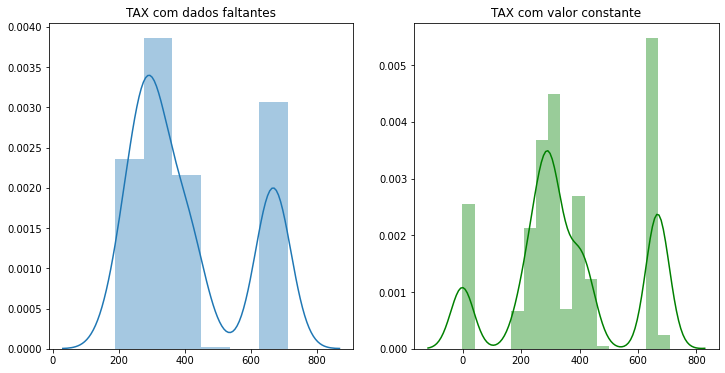

In [ ]:
X_TAX_const = imp_const.fit_transform(X_null['TAX'].values.reshape(-1,1))

fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.distplot(X_null['TAX'], ax=ax[0])
sns.distplot(X_TAX_const, ax=ax[1], color='green')
ax[0].set(title="TAX com dados faltantes", xlabel="", ylabel="")
ax[1].set(title="TAX com valor constante", xlabel="", ylabel="")
plt.show()

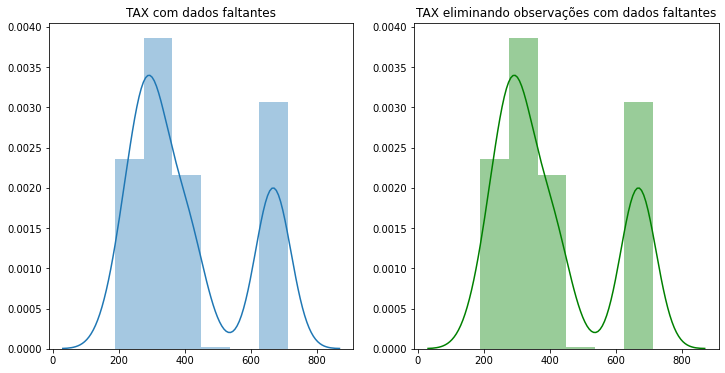

In [ ]:
X_TAX_drop = X_null['TAX'].dropna().values.reshape(-1,1)

fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.distplot(X_null['TAX'], ax=ax[0])
sns.distplot(X_TAX_drop, ax=ax[1], color='green')
ax[0].set(title="TAX com dados faltantes", xlabel="", ylabel="")
ax[1].set(title="TAX eliminando observações com dados faltantes", xlabel="", ylabel="")
plt.show()

### 3. Codificando variáveis categóricas

In [ ]:
X['AGE_discrete'] = pd.qcut(X['AGE'], 4) #Criando uma coluna para simular a codificação de variáveis categóricas

In [ ]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(X[['AGE_discrete']])
age_one_hot = ohe.transform(X[['AGE_discrete']])
age_one_hot = pd.DataFrame(age_one_hot, columns=ohe.categories_)
age_one_hot.head()

,"(2.899, 45.025]","(45.025, 77.5]","(77.5, 94.075]","(94.075, 100.0]"
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [ ]:
ord = OrdinalEncoder()
ord.fit(X[['AGE_discrete']])
age_ordinal = ord.transform(X[['AGE_discrete']])
age_ordinal = pd.DataFrame(age_ordinal, columns=['AGE_discrete'])
age_ordinal.head()

,AGE_discrete
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


### 4. Transformando variáveis numéricas

In [ ]:
X.drop(columns='AGE_discrete', inplace=True)

In [ ]:
mm = MinMaxScaler()
mm.fit(X)
X_minmax = mm.transform(X)
X_minmax

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

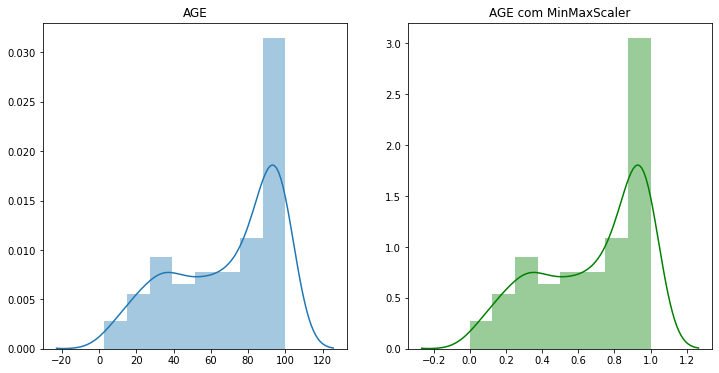

In [ ]:
X_AGE_ss =  mm.fit_transform(X[['AGE']])

fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.distplot(X['AGE'], ax=ax[0])
sns.distplot(X_AGE_ss, ax=ax[1], color='green')
ax[0].set(title="AGE", xlabel="", ylabel="")
ax[1].set(title="AGE com MinMaxScaler", xlabel="", ylabel="")
plt.show()

In [ ]:
ss = StandardScaler()
ss.fit(X)
X_sscaler = ss.transform(X)
X_sscaler

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

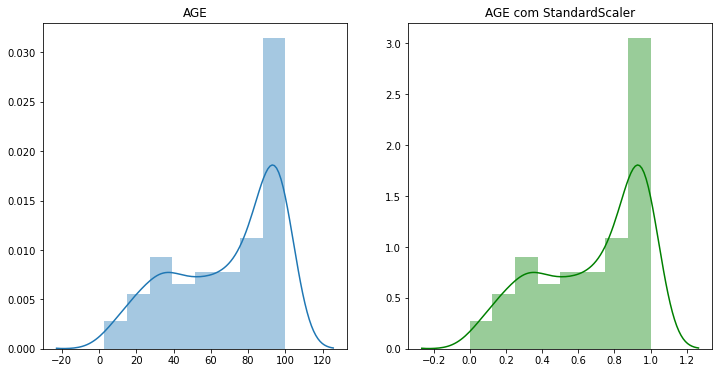

In [ ]:
X_AGE_ss =  mm.fit_transform(X[['AGE']])

fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.distplot(X['AGE'], ax=ax[0])
sns.distplot(X_AGE_ss, ax=ax[1], color='green')
ax[0].set(title="AGE", xlabel="", ylabel="")
ax[1].set(title="AGE com StandardScaler", xlabel="", ylabel="")
plt.show()

### 5. Tratamento de *outliers*

In [ ]:
def remove_outliers_iqr(col, pct=1.5):
  Q1, Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  inf = Q1 - pct*IQR
  sup = Q3 + pct*IQR
  return np.where(col < inf, inf, np.where(col > sup, sup, col))

In [ ]:
def remove_outliers_std(col, pct=3):
  std = col.std()
  mean = col.mean()
  lim = pct*std
  return np.where(col < mean - lim, lim, np.where(col > mean + lim, lim, col))

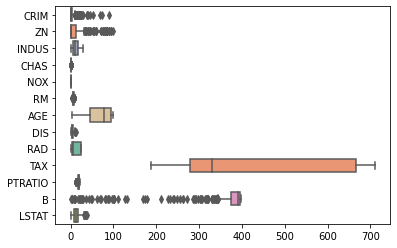

In [ ]:
sns.boxplot(data=X, orient="h", palette="Set2"); # O boxplot mostra as colunas com possíveis outliers

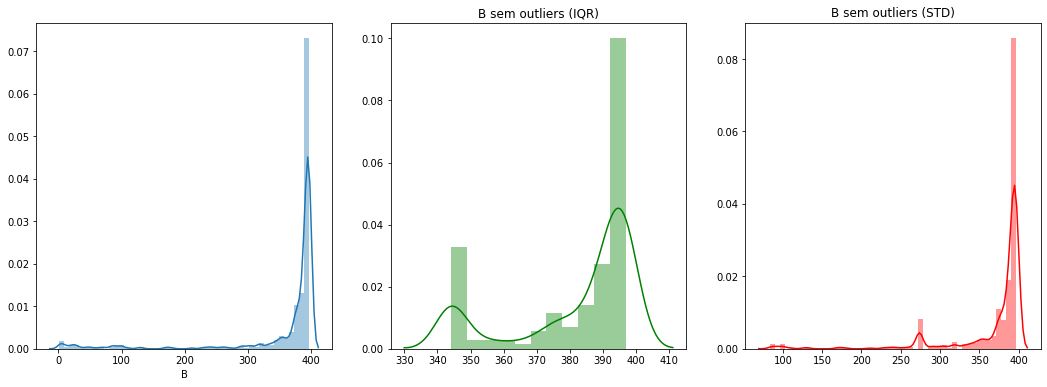

In [ ]:
X['B_out_iqr'] = remove_outliers_iqr(X['B'])
X['B_out_std'] = remove_outliers_std(X['B'])


fig, ax = plt.subplots(1, 3, figsize=(18,6))
sns.distplot(X['B'], ax=ax[0])
sns.distplot(X['B_out_iqr'], ax=ax[1], color='green')
sns.distplot(X['B_out_std'], ax=ax[2], color='red')
ax[1].set(title="B sem outliers (IQR)", xlabel="", ylabel="")
ax[2].set(title="B sem outliers (STD)", xlabel="", ylabel="")
plt.show();

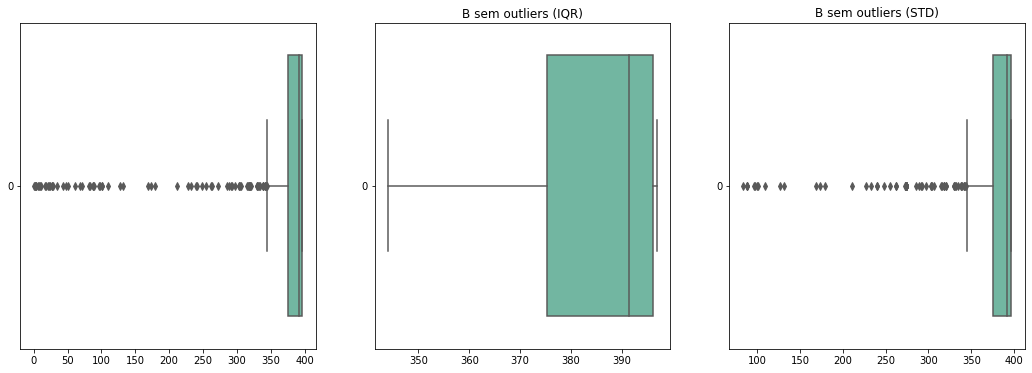

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))
sns.boxplot(data=X['B'], orient="h", palette="Set2", ax=ax[0]);
sns.boxplot(data=X['B_out_iqr'], orient="h", palette="Set2", ax=ax[1]);
sns.boxplot(data=X['B_out_std'], orient="h", palette="Set2", ax=ax[2]);
ax[1].set(title="B sem outliers (IQR)", xlabel="", ylabel="")
ax[2].set(title="B sem outliers (STD)", xlabel="", ylabel="")
plt.show();

Fim.